In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm.auto import tqdm
import time
from sklearn.linear_model import LogisticRegression

import sys
#sys.path.append()
from KGB import preprocess_df, proceed_KGB


plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")

In [2]:
current_dataset = 6
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110816-donbot.pcap', 'capture20110816.binetflow', 'README']

In [3]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df = preprocess_df(df)
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
24,2011-08-16 10:01:46.972101,3599.986572,tcp,88.176.79.163,49213,<?>,147.32.84.172,18250,A_PA,0.0,0.0,414671,415389446,10150692,flow=Background,True,False,False
25,2011-08-16 10:01:46.974947,320.268677,tcp,147.32.85.112,22,<?>,85.70.14.207,10005,FPA_FPA,0.0,0.0,31989,7744510,6056438,flow=Background,True,False,False
26,2011-08-16 10:01:46.976831,0.000467,udp,90.178.10.8,61997,<->,147.32.84.229,13363,CON,0.0,0.0,2,236,174,flow=Background-UDP-Established,True,False,False
27,2011-08-16 10:01:46.977232,0.009599,tcp,117.211.100.130,43458,?>,147.32.86.92,80,RA_,0.0,NaN,4,264,264,flow=Background,True,False,False
28,2011-08-16 10:01:46.979356,3599.942383,tcp,88.176.79.163,49375,<?>,147.32.84.172,46696,A_PA,0.0,0.0,471746,473057124,11502112,flow=Background,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558914,2011-08-16 12:10:56.783227,0.000241,udp,147.32.84.59,47132,<->,147.32.80.9,53,CON,0.0,0.0,2,230,90,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558915,2011-08-16 12:10:56.783863,0.000360,udp,147.32.84.59,33462,<->,147.32.80.9,53,CON,0.0,0.0,2,307,86,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558916,2011-08-16 12:10:56.783922,0.000419,udp,147.32.84.59,50059,<->,147.32.80.9,53,CON,0.0,0.0,2,254,77,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
558917,2011-08-16 12:10:56.802376,0.041333,tcp,84.42.129.253,33357,->,147.32.84.36,443,SPA_SPA,0.0,0.0,15,6824,1142,flow=Background-TCP-Established,True,False,False


In [4]:
proceed_KGB(df, 2000 ) 

147.32.84.138    3424.410330
147.32.84.170    2503.971761
147.32.84.59     5150.343070
147.32.86.20     2061.163110
147.32.86.223    2009.644193
dtype: float64

In [7]:
df[df.SrcAddr=="147.32.84.165"] # c'est l'attaquant

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
2909,2011-08-16 10:02:08.703460,0.167688,udp,147.32.84.165,1025,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=From-Botnet-V47-UDP-DNS,False,False,True
2935,2011-08-16 10:02:08.872739,500.003357,tcp,147.32.84.165,1039,->,195.113.232.73,80,SPA_FSPA,0.0,0.0,14,5498,531,flow=From-Botnet-V47-TCP-Established-HTTP-Ad-4,False,False,True
39074,2011-08-16 10:09:58.055700,1.896288,tcp,147.32.84.165,1040,->,91.212.135.158,5678,FSPA_FSPA,0.0,0.0,1417,1255401,32823,flow=From-Botnet-V47-TCP-CC73-Not-Encrypted,False,False,True
39197,2011-08-16 10:09:59.890489,0.147772,udp,147.32.84.165,1041,<->,147.32.80.9,53,CON,0.0,0.0,2,229,88,flow=From-Botnet-V47-UDP-DNS,False,False,True
39212,2011-08-16 10:10:00.039348,0.000391,udp,147.32.84.165,1042,<->,147.32.80.9,53,CON,0.0,0.0,2,326,86,flow=From-Botnet-V47-UDP-DNS,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554753,2011-08-16 12:10:08.795607,2.942743,tcp,147.32.84.165,4856,->,220.225.80.179,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554754,2011-08-16 12:10:08.795910,2.942500,tcp,147.32.84.165,4857,->,67.231.152.94,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554755,2011-08-16 12:10:08.796217,2.942256,tcp,147.32.84.165,4858,->,24.71.223.11,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True
554756,2011-08-16 12:10:08.796508,2.942027,tcp,147.32.84.165,4859,->,89.6.186.79,25,S_,0.0,NaN,2,124,124,flow=From-Botnet-V47-TCP-Attempt-SPAM,False,False,True


In [10]:
#"147.32.84.165"
end = pd.to_datetime("2011-08-16 12:10:15.643807")
cutted = df[df.StartTime<= end]
proceed_KGB(cutted, 1500 ) 

147.32.84.138    3788.001728
147.32.84.165    2401.262082
147.32.84.170    2394.102545
147.32.84.229    1581.802007
147.32.84.59     5499.569479
147.32.85.25     2006.346081
147.32.85.34     1863.057186
147.32.86.187    1911.690136
147.32.86.20     2279.569335
147.32.86.223    1547.398121
dtype: float64

In [14]:
window = 5
step = 1

window_delta = pd.Timedelta(window, "m")
min_time = df.StartTime.iloc[0]
max_time = df.StartTime.iloc[-1]
duration = max_time-min_time - window_delta
number_of_iterations = int(duration.total_seconds() / (step*60))


res = []
for i in tqdm(range(number_of_iterations)) :
    time_of_end = min_time + window_delta + pd.Timedelta(step*i, "m")
    cutted = df[df.StartTime<= time_of_end ]
    res.append(proceed_KGB(cutted, 0 ) )
#res    
    


  0%|          | 0/124 [00:00<?, ?it/s]

In [15]:
result = pd.concat(res)
result

1.195.61.39         2.885554
101.68.233.223     17.340837
109.43.0.21         3.303572
109.80.225.83       5.506812
113.162.114.113     1.973853
                     ...    
94.251.30.193       3.510049
94.253.4.122        3.510049
95.153.171.92      12.394531
95.159.46.178       3.510049
98.154.89.120       7.963101
Length: 36995, dtype: float64

<AxesSubplot:>

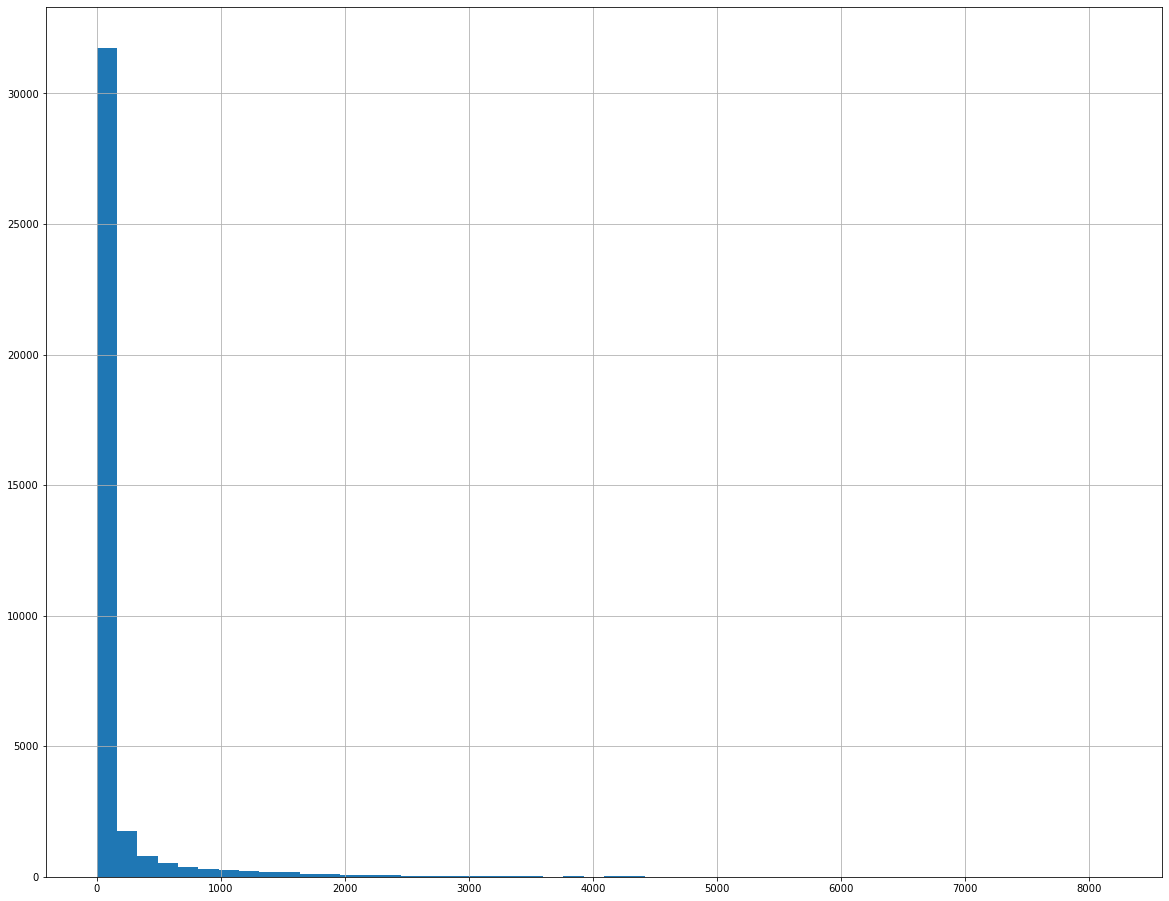

In [16]:
result.hist(bins = 50)

# Label

In [23]:
list_botnets = ["147.32.84.165"]
def label_data(serie, list_botnets) :
    labels = []
    for index, row in tqdm(serie.iteritems()) :
        labels.append(index in list_botnets)
    
    return pd.DataFrame({"IP_src" : serie.index, "anomaly_score" : serie.values, "label" : labels })
    
labelled_res =  label_data(result, list_botnets)
labelled_res.sort_values("anomaly_score", ascending=False, inplace = True)
labelled_res

0it [00:00, ?it/s]

,IP_src,anomaly_score,label
1123,147.32.84.59,8181.006081,False
86,147.32.84.59,8056.979397,False
472,147.32.84.59,8028.629142,False
805,147.32.84.59,7932.005016,False
1437,147.32.84.59,7484.108500,False
...,...,...,...
14360,71.40.217.114,0.047218,False
14151,121.10.123.59,0.047218,False
15021,121.10.123.59,0.042660,False
15236,71.40.217.114,0.042660,False


In [26]:
whitelist = ["147.32.84.59", "147.32.84.138"]
labelled_res[~labelled_res.IP_src.isin(whitelist)]

,IP_src,anomaly_score,label
5042,147.32.85.76,3590.615341,False
4758,147.32.85.76,3520.367003,False
1170,147.32.86.20,3351.864734,False
134,147.32.86.165,3309.772016,False
857,147.32.86.20,3278.494118,False
...,...,...,...
14360,71.40.217.114,0.047218,False
14151,121.10.123.59,0.047218,False
15021,121.10.123.59,0.042660,False
15236,71.40.217.114,0.042660,False


In [33]:
values_weights = labelled_res.label.value_counts()
len_res = len(labelled_res)
labelled_res["weights"] = labelled_res["label"].apply(lambda x : len_res/values_weights.loc[x] )
labelled_res.sort_values("weights", ascending=False)

,IP_src,anomaly_score,label,weights
8355,147.32.84.165,1542.582574,True,305.743802
10331,147.32.84.165,1630.708688,True,305.743802
15924,147.32.84.165,1217.376389,True,305.743802
7219,147.32.84.165,1634.067228,True,305.743802
11490,147.32.84.165,1633.350589,True,305.743802
...,...,...,...,...
20627,121.203.143.126,15.234713,False,1.003281
31991,147.32.86.58,15.234181,False,1.003281
26130,147.32.85.96,15.232442,False,1.003281
31975,147.32.86.181,15.227096,False,1.003281


In [42]:
labelled_res[labelled_res.label==1].anomaly_score.describe()

count     121.000000
mean     1763.373840
std       521.931746
min        10.426365
25%      1466.991357
50%      1693.160450
75%      2078.794528
max      2913.176999
Name: anomaly_score, dtype: float64

# Naives-Bayes

In [34]:
X = labelled_res.anomaly_score.values.reshape(-1, 1)
Y = labelled_res.label


In [35]:
weights = labelled_res.weights.values

clf = LogisticRegression(random_state=4242)
clf.fit(X, Y, sample_weight = weights)
clf.coef_, clf.intercept_

(array([[0.00401378]]), array([-3.42322198]))

In [36]:
clf = LogisticRegression(random_state=4242)
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00098467]]), array([-6.2436578]))

In [40]:
clf = LogisticRegression(random_state=4242,class_weight = "balanced")
clf.fit(X, Y)
clf.coef_, clf.intercept_

(array([[0.00401378]]), array([-3.42322198]))